In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emotion-Recognition-from-Speech/dataset.csv')
Features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_156,Feature_157,Feature_158,Feature_159,Feature_160,Feature_161,Feature_162,Feature_163,Feature_164,label
0,0.266808,-509.529572,24.022825,-14.907886,-0.697563,-11.522958,-9.965440,-11.921485,-13.617157,-3.646201,...,0.001355,0.000793,0.000972,0.001552,0.001190,1.153455e-04,3415.965681,6199.068541,0.536707,fearful+normal+female
1,0.413118,-730.670471,38.349815,2.674319,9.384073,-5.979620,-3.029608,-11.018359,-9.151864,-7.464394,...,0.000024,0.000019,0.000015,0.000011,0.000005,4.307079e-07,3595.106464,6334.114193,0.499593,calm+normal+female
2,0.345513,-683.846619,41.367165,-2.767712,1.023483,-4.020317,-7.462221,-11.155664,-7.080593,-11.429027,...,0.000044,0.000041,0.000028,0.000022,0.000016,1.913279e-06,3434.880446,6269.021037,0.470204,calm+strong+female
3,0.277406,-578.768799,50.480259,-11.826157,3.023091,-10.381796,-13.910265,-5.369832,-13.442755,-10.330565,...,0.000273,0.000396,0.000903,0.001079,0.000450,4.981600e-05,2765.004332,5179.336532,0.582388,sad+strong+female
4,0.308712,-708.799866,48.700954,1.122221,0.025111,-7.621972,-7.224838,-12.110167,-8.403195,-12.154092,...,0.000056,0.000051,0.000021,0.000025,0.000012,7.320705e-07,3130.792541,5595.043945,0.468202,calm+strong+female


In [5]:
from sklearn.utils import shuffle
temp = shuffle(Features)

In [6]:
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [7]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [8]:
from keras import utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

In [9]:
lb = LabelEncoder()

y_train = utils.to_categorical(lb.fit_transform(y_train), num_classes=30)
y_test = utils.to_categorical(lb.transform(y_test), num_classes=30)

In [10]:
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

In [11]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers

model = models.Sequential()

model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_cnn, y_train, batch_size=256, epochs=5000, validation_data=(X_test_cnn, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9485 - loss: 0.0823 - val_accuracy: 0.9068 - val_loss: 0.3698
Epoch 2502/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9513 - loss: 0.0763 - val_accuracy: 0.9049 - val_loss: 0.3492
Epoch 2503/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9449 - loss: 0.0700 - val_accuracy: 0.9107 - val_loss: 0.3612
Epoch 2504/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9444 - loss: 0.0831 - val_accuracy: 0.9068 - val_loss: 0.3800
Epoch 2505/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9552 - loss: 0.0718 - val_accuracy: 0.9068 - val_loss: 0.3618
Epoch 2506/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9430 - loss: 0.0853 - val_accuracy: 0.9029 - val_loss: 0.3717
Epoch 2507/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9434 - loss: 0.0813 - val_accuracy: 0.8971 - val_loss: 0.3713
Epoch 2508/5000
10/10 ━━━

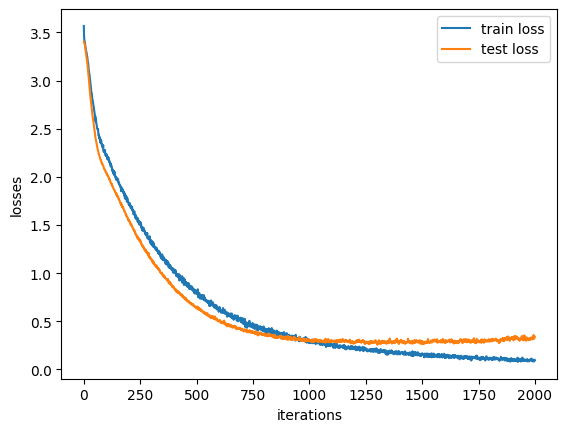

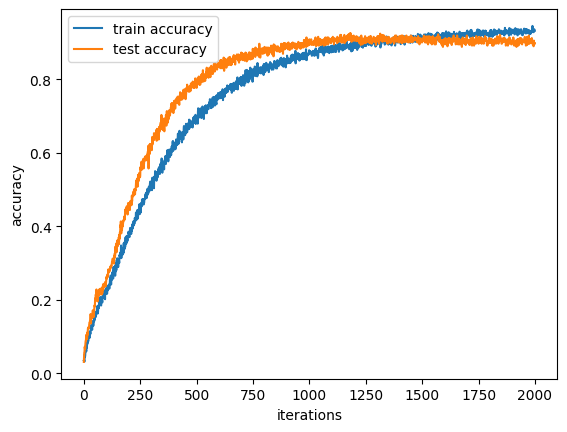

In [ ]:
plotter(history)

In [19]:
model.save('/content/drive/MyDrive/Colab Notebooks/Emotion-Recognition-from-Speech/Models/cnn-model.h5')

In [40]:
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Emotion-Recognition-from-Speech/Weights/CNN-Weights.weights.h5")